In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Python_google_colab/archive (6)/train_u6lujuX_CVtuZ9i.csv')

In [11]:
train.shape

(614, 13)

In [12]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

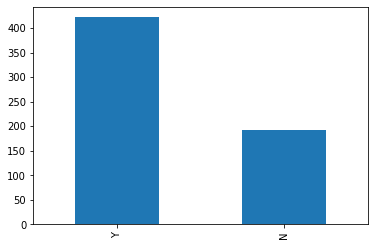

In [14]:
train['Loan_Status'].value_counts().plot.bar()

In [15]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [18]:
train.isnull().sum().any()

False

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [21]:
############### Numerical Features ################################
numerical_features = [ f for f in train.columns if train[f].dtypes != 'O']

In [22]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [28]:

############### Categorical Features ################################
categorical_features = [ f for f in train.columns if train[f].dtypes == 'O' and f not in 'Loan_ID']
print(categorical_features)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


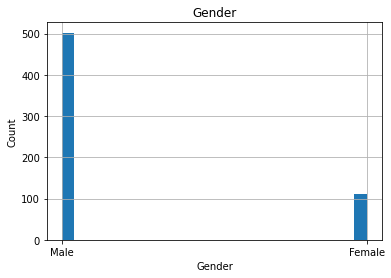

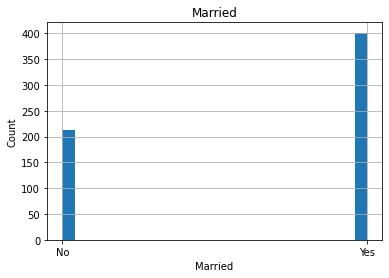

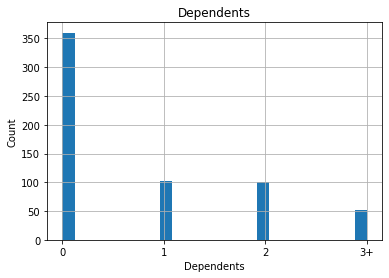

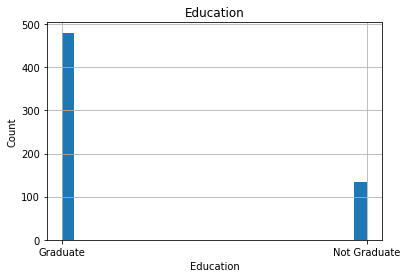

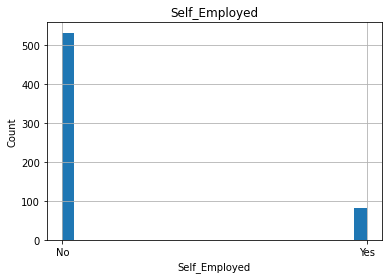

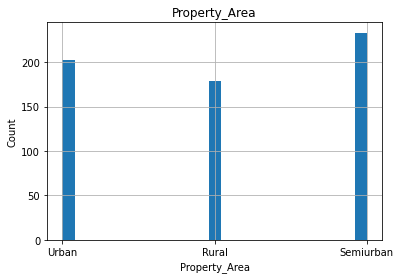

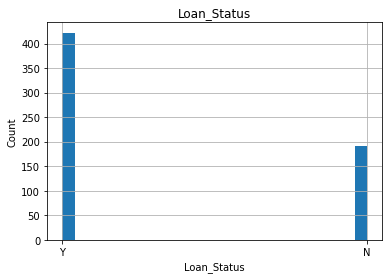

In [30]:
import matplotlib.pyplot as plt

############### Categorical Features ################################
for feature in categorical_features:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

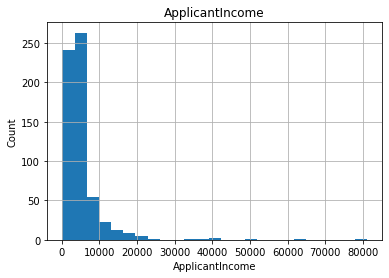

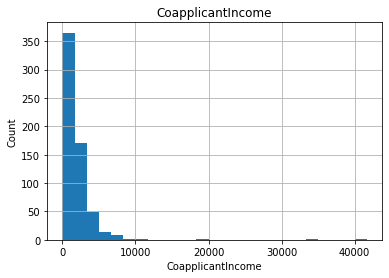

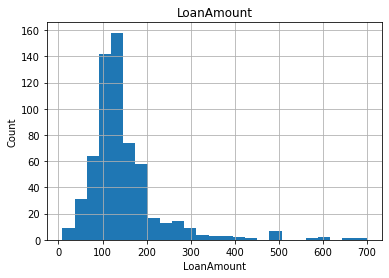

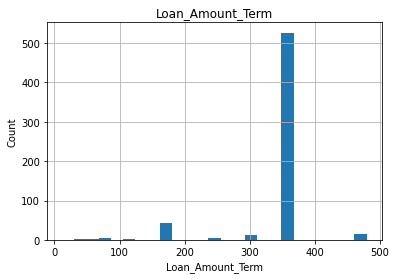

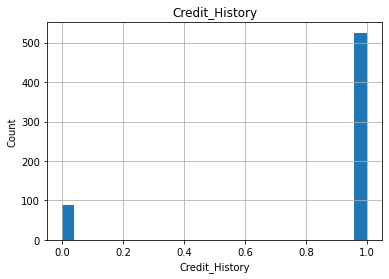

In [32]:
############### Categorical Features ################################
for feature in numerical_features:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [33]:
#['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [34]:
train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [35]:
train['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [36]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [37]:
train['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [38]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [42]:
train_new = train[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']]
df_new = pd.get_dummies(train_new, drop_first = True)

In [43]:
df_new.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1
3,1,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,1


In [48]:
final_df = pd.concat([df_new ,train[['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History','Loan_Status']]],axis=1)

In [49]:
final_df.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,0,0,0,1,5849,0.0,128.0,360.0,1.0,Y
1,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0,1.0,N
2,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0,1.0,Y
3,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0,1.0,Y
4,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0,1.0,Y


In [50]:
final_df.shape

(614, 15)

In [51]:
final_df.isnull().sum()

Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
dtype: int64

In [52]:
X = final_df.drop(['Loan_Status'],axis=1)
y = final_df['Loan_Status']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
X_train_scaled  = sc.fit_transform(X_train)
x_test_scaled = sc.transform(X_test)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LRmodel = LogisticRegression()
LRmodel.fit(X_train_scaled, y_train)


y_pred = LRmodel.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is:" ,accuracy)

Accuracy is: 0.8540540540540541


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled,y_train)

print("train score: ", knn_clf.score(X_train_scaled,y_train))
print("test score: " , knn_clf.score(x_test_scaled,y_test))

acc = []
value = []
for i in range(2,11):
  knn_clf = KNeighborsClassifier(n_neighbors = i)
  knn_clf.fit(X_train_scaled,y_train)
  y_pred = knn_clf.predict(x_test_scaled)
  acc.append(accuracy_score(y_test,y_pred))
  value.append(i)

print(acc) 
print(value)
print((value[acc.index(max(acc))],max(acc)))

train score:  0.7925407925407926
test score:  0.7837837837837838
[0.6054054054054054, 0.7675675675675676, 0.7027027027027027, 0.7837837837837838, 0.7675675675675676, 0.827027027027027, 0.7945945945945946, 0.827027027027027, 0.827027027027027]
[2, 3, 4, 5, 6, 7, 8, 9, 10]
(7, 0.827027027027027)


In [64]:
######################## k = 7 works really well with 82 % accuracy ###########################

In [67]:

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train_scaled,y_train)
rf_y_pred = clf_rf.predict(x_test_scaled)

print("Accuracy of train data: " , clf_rf.score(X_train_scaled,y_train))
print("Accuracy of test data: " , clf_rf.score(x_test_scaled,rf_y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of RFC is:" ,accuracy)

Accuracy of train data:  1.0
Accuracy of test data:  1.0
Accuracy of RFC is: 0.827027027027027


In [68]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(clf_rf, parameters)
grid_obj = grid_obj.fit(X_train_scaled, y_train)


rf_best = grid_obj.best_estimator_
print("best parameters for RFC:",rf_best)

rf_best.fit(X_train_scaled,y_train)
rf_y_pred_best = rf_best.predict(x_test_scaled)

print("Accuracy of train data after HPT: " , rf_best.score(X_train_scaled,y_train))
print("Accuracy of test data after HPT : " , rf_best.score(x_test_scaled,rf_y_pred_best))

best parameters for RFC: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy of train data after HPT:  0.7832167832167832
Accuracy of test data after HPT :  1.0


In [69]:
print("Accuracy after HPT of RFC: ", accuracy_score(y_test, rf_y_pred_best) )

Accuracy after HPT of RFC:  0.8594594594594595


In [70]:
############################ after HPT of RFC , it gives --- 86% accuracy ##############################


In [101]:
###################################### DEEP LEARNING USING PYTORCH ##########################
import torch
X1 = df_cuda_dt.drop(['Loan_Status','Y'],axis=1)
y1 = df_cuda_dt['Y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.4)

from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
X_train_scaled  = sc.fit_transform(X_train)
x_test_scaled = sc.transform(X_test)

X_train=torch.FloatTensor(X_train_scaled).cuda()
X_test=torch.FloatTensor(x_test_scaled).cuda()
y_train= torch.LongTensor(y_train.values).cuda()
y_test=torch.LongTensor(y_test.values).cuda()

In [78]:
########################## had to convert YES and NO into "0 " and "1 " #################

In [441]:
import torch
from torch import nn
import torchvision

class LOAN_cancer(nn.Module):
  def __init__(self,input=14,hidden1=56,hidden2=32,hidden3 = 16 ,hidden4 = 6,output=2):
    super(LOAN_cancer,self).__init__()
    self.FC1 = nn.Linear(input,hidden1)
    self.relu1 = nn.ReLU()
    self.FC2 = nn.Linear(hidden1,hidden2)
    self.relu2 = nn.ReLU()
    self.FC3 = nn.Linear(hidden2,hidden3)
    self.relu3 = nn.ReLU()
    self.FC4 = nn.Linear(hidden3,hidden4)
    self.relu4 = nn.ReLU()
    self.FC5 = nn.Linear(hidden4,output)
  def forward(self,x):
    x = self.FC1(x)
    x = self.relu1(x)
    x = self.FC2(x)
    x = self.relu2(x)
    x = self.FC3(x)
    x = self.relu3(x)
    x = self.FC4(x)
    x = self.relu4(x)
    x = self.FC5(x)
    #y_pred  = torch.sigmoid(x)
    return x

In [79]:
X1.shape

(614, 14)

In [446]:
model1 = LOAN_cancer()
loss_fn = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr = 0.003)

model1  = model1.cuda()

print(model1.parameters)

<bound method Module.parameters of LOAN_cancer(
  (FC1): Linear(in_features=14, out_features=56, bias=True)
  (relu1): ReLU()
  (FC2): Linear(in_features=56, out_features=32, bias=True)
  (relu2): ReLU()
  (FC3): Linear(in_features=32, out_features=16, bias=True)
  (relu3): ReLU()
  (FC4): Linear(in_features=16, out_features=6, bias=True)
  (relu4): ReLU()
  (FC5): Linear(in_features=6, out_features=2, bias=True)
)>


In [447]:
epochs = 40
final_losses=[]
for i in range(epochs):
  y_pred1 = model1.forward(X_train)
  
  optimizer1.zero_grad()
  #l1 = loss_fn(y_pred1,y_train.reshape(-1,1))
  l1 = loss_fn(y_pred1,y_train)
  if i%10 == 0:
    print("Epoch number: {} and the loss : {}".format(i,l1))
  l1.backward()
  final_losses.append(l1)
  optimizer1.step()
  

Epoch number: 0 and the loss : 0.7500405311584473
Epoch number: 10 and the loss : 0.7147434949874878
Epoch number: 20 and the loss : 0.6260210275650024
Epoch number: 30 and the loss : 0.5378287434577942


Text(0.5, 0, 'Epoch')

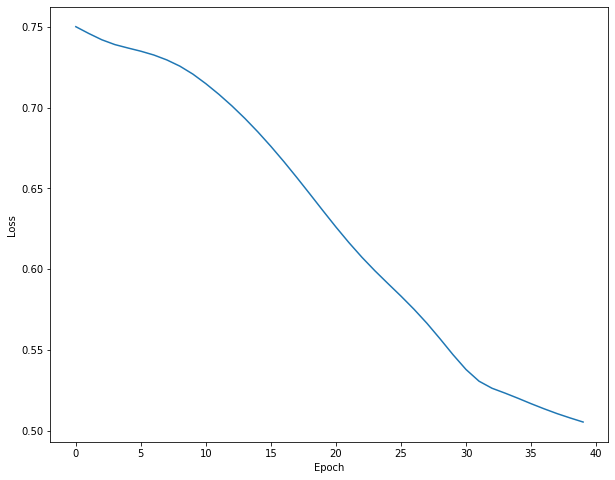

In [448]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [449]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred12=model1(data)
        predictions.append(y_pred12.argmax().item())




y_test1 = y_test.cpu().numpy()
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test1,predictions)
print("confusion Matrix\n" , cm)

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test1,predictions)
print("score", score)

confusion Matrix
 [[ 33  38]
 [  3 172]]
score 0.8333333333333334


In [ ]:
##################### LR- 0.03 , epochs = 30 gives 78 % accuracy 
##################### LR - 0.03 ,epochs = 100 gives 75% accuracy
####################3# LR - 0.003 ,epochs = 40 gives- 82 % accuracy
####################3# LR - 0.005 ,epochs = 40 gives- 83 % accuracy
# 0.8373983739837398 --- LR -0.01 ,epochs - 50


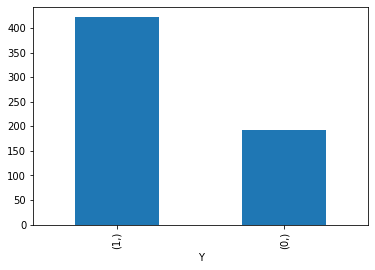

In [87]:
y1.value_counts().plot.bar()

In [92]:
y_train.shape

torch.Size([368, 1])

In [93]:
final_df.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,0,0,0,1,5849,0.0,128.0,360.0,1.0,Y
1,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0,1.0,N
2,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0,1.0,Y
3,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0,1.0,Y
4,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0,1.0,Y


In [95]:
new_y1_output = pd.get_dummies(final_df['Loan_Status'] ,drop_first = True)

In [96]:
new_y1_output

,Y
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [98]:
df_cuda_dt = pd.concat([new_y1_output , final_df],axis=1)

In [99]:
df_cuda_dt.head()

,Y,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,1,0,0,0,0,0,0,0,1,5849,0.0,128.0,360.0,1.0,Y
1,0,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0,1.0,N
2,1,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0,1.0,Y
3,1,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0,1.0,Y
4,1,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0,1.0,Y
